In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [21]:
df = pd.read_csv('TSLA.csv')


In [4]:
df.shape


(2416, 7)

In [5]:
df.dtypes


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [7]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [22]:
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)
# print(pd.DatetimeIndex(df['Date']))
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-06-29,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [9]:

df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [10]:
df.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression


x, y = df.drop(['Close', 'Date'], axis=1), df.Close
xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.3, shuffle=False, random_state=0)
model = LinearRegression()
model.fit(xtrain, ytrain)


LinearRegression()

In [12]:
pred = model.predict(xtest)
ndf = pd.DataFrame({'Predicted': pred.reshape(len(ytest)),
                    'Actual': ytest.to_numpy()}, index=xtest.index)
ndf


,Predicted,Actual
Date,,
2017-03-17,261.500000,261.500000
2017-03-20,261.920013,261.920013
2017-03-21,250.679993,250.679993
2017-03-22,255.009995,255.009995
2017-03-23,254.779999,254.779999
...,...,...
2020-01-28,566.900024,566.900024
2020-01-29,580.989990,580.989990
2020-01-30,640.809998,640.809998


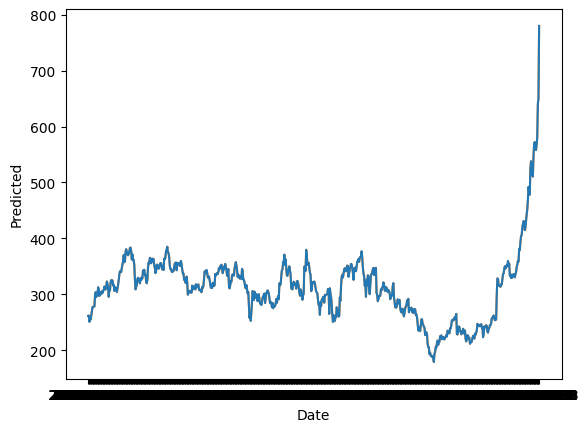

In [13]:

# plt.figure(figsize=(100,100))

sns.lineplot(ndf, y='Predicted', x=ndf.index,
             dashes=False, color='#ff7f0e',)
sns.lineplot(ndf, y='Actual', x=ndf.index, dashes=False, color='#2279b5')
plt.savefig('StockPlot.png')


In [14]:
model.intercept_


-5.115907697472721e-13

In [15]:
model.coef_


array([ 2.22781933e-14, -1.70845800e-14, -2.10885601e-15,  1.00000000e+00,
       -5.27237184e-20])

In [16]:
model.score(xtest, ytest)


1.0

In [17]:
mean_absolute_error(ytest, model.predict(xtest))


7.817734199463679e-13

In [18]:
mean_squared_error(ytest, model.predict(xtest))


7.324693237741247e-25